<a href="https://colab.research.google.com/github/Aryan-Kamboj11/Multimodal-Hate-Speech-Detection/blob/main/ImagePreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
clean_data = pd.read_csv("/content/drive/MyDrive/Dataset/data_tokenized.csv")
clean_data.head()

,Unnamed: 0,text,label,image_path,cleaned_text,input_ids,attention_mask
0,0,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[1, 0, 0]",Dataset/images/0.jpg,rt xxsugvngxx: i ran into this holy nigga today,"tensor([ 101, 19387, 22038, 6342, 2290, 160...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,1,“EVERYbody calling you Nigger now!” https://t....,"[1, 0, 1]",Dataset/images/1.jpg,“everybody calling you nigger now!”,"tensor([ 101, 1523, 7955, 4214, 2017, 91...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,2,@WhiteHouse @realDonaldTrump Fuck ice. White s...,"[5, 1, 1]",Dataset/images/2.jpg,[user] [user] fuck ice. white supremacist tras...,"tensor([ 101, 1030, 2317, 4580, 1030, 26...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,3,#sissy faggot https://t.co/bm1nk8HcYO,"[3, 3, 0]",Dataset/images/3.jpg,sissy faggot,"tensor([ 101, 1001, 24761, 6508, 6904, 138...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,4,@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1,"[4, 0, 3]",Dataset/images/4.jpg,[user] nigga what?,"tensor([ 101, 1030, 1043, 10626, 12676, 10...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


In [4]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [8]:
def load_and_transform_image(image_path):
    try:
      base_dir = "/content/drive/MyDrive"
      full_image_path = os.path.join(base_dir, image_path)
      image = Image.open(full_image_path)
      transformed_image = transform(image)

      if not isinstance(transformed_image,torch.Tensor):
        raise ValueError("Transformed image is not a PyTorch tensor.")
      if transformed_image.shape != (3, 224, 224):
        raise ValueError("Transformed image has unexpected shape.")

      if transformed_image.min() < -3 or transformed_image.max() > 3:
        raise ValueError("Transformed image values are out of range.")
      print(f"Successfully transformed image at {full_image_path}")
      return transformed_image
    except Exception as e:
      print(f"Error processing image at {full_image_path}: {e}")
      return transform(Image.new("RGB", (224, 224), color="black"))

In [12]:
clean_data["image"] = clean_data["image_path"].apply(load_and_transform_image)

transformed_image_dir = "/content/drive/MyDrive/Dataset/transformed_images"
os.mkdir(transformed_image_dir)
image_paths = []

for idx,row in clean_data.iterrows():
  image_tensor = row["image"]
  image_name = f"transformed_image_{idx}.png"
  image_path = os.path.join(transformed_image_dir,image_name)
  torch.save(image_tensor,image_path)
  image_paths.append(image_path)

clean_data["transformed_image_path"] = image_paths

clean_data.drop(columns=["image"],inplace=True)

clean_data.to_csv("/content/drive/MyDrive/Dataset/data_transformed.csv",index=False)
clean_data.head()

Successfully transformed image at /content/drive/MyDrive/Dataset/images/0.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/1.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/2.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/3.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/4.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/5.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/6.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/7.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/8.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/9.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/10.jpg
Successfully transformed image at /content/drive/MyDrive/Dataset/images/11.jpg
Successfully transformed image at /content/drive/MyDrive/Datas

,Unnamed: 0,text,label,image_path,cleaned_text,input_ids,attention_mask,transformed_image_path
0,0,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[1, 0, 0]",Dataset/images/0.jpg,rt xxsugvngxx: i ran into this holy nigga today,"tensor([ 101, 19387, 22038, 6342, 2290, 160...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",/content/drive/MyDrive/Dataset/transformed_ima...
1,1,“EVERYbody calling you Nigger now!” https://t....,"[1, 0, 1]",Dataset/images/1.jpg,“everybody calling you nigger now!”,"tensor([ 101, 1523, 7955, 4214, 2017, 91...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",/content/drive/MyDrive/Dataset/transformed_ima...
2,2,@WhiteHouse @realDonaldTrump Fuck ice. White s...,"[5, 1, 1]",Dataset/images/2.jpg,[user] [user] fuck ice. white supremacist tras...,"tensor([ 101, 1030, 2317, 4580, 1030, 26...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",/content/drive/MyDrive/Dataset/transformed_ima...
3,3,#sissy faggot https://t.co/bm1nk8HcYO,"[3, 3, 0]",Dataset/images/3.jpg,sissy faggot,"tensor([ 101, 1001, 24761, 6508, 6904, 138...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",/content/drive/MyDrive/Dataset/transformed_ima...
4,4,@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1,"[4, 0, 3]",Dataset/images/4.jpg,[user] nigga what?,"tensor([ 101, 1030, 1043, 10626, 12676, 10...","tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",/content/drive/MyDrive/Dataset/transformed_ima...


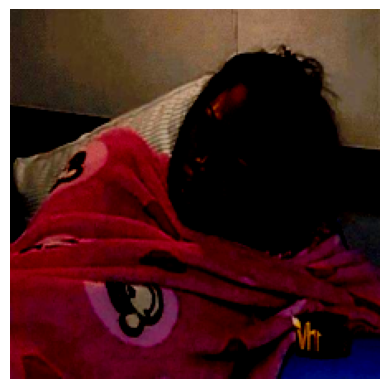

In [13]:
def show_tensor_image(tensor):
    # Convert to numpy and transpose the dimensions
    if tensor.dim() == 3 and tensor.shape[0] in [1, 3]:
        # [C, H, W] -> [H, W, C]
        img = tensor.permute(1, 2, 0).numpy()

        # For single channel images
        if img.shape[2] == 1:
            img = img.squeeze(2)
            plt.imshow(img, cmap='gray')
        else:
            # For RGB images, in case of normalization
            plt.imshow(img)
    else:
        plt.imshow(tensor.numpy())

    plt.axis('off')
    plt.show()

# Call the function
show_tensor_image(image_tensor)

In [ ]:
clean_data["image"] = clean_data["image_path"].apply(load_and_transform_image)

transformed_image_dir = "/content/drive/MyDrive/Dataset/transformed_images"
# os.mkdir(transformed_image_dir)
image_paths = []

for idx,row in clean_data.iterrows():
  image_tensor = row["image"]
  image_name = f"transformed_image_{idx}.png"
  image_path = os.path.join(transformed_image_dir,image_name)
  torch.save(image_tensor,image_path)
  image_paths.append(image_path)

clean_data["transformed_image_path"] = image_paths

clean_data.drop(columns=["image"],inplace=True)

clean_data.to_csv("/content/drive/MyDrive/Dataset/data_transformed.csv",index=False)
clean_data.head()